## Preprocessing

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

***

## 5.a. Generating dataset with $n$=500 and $p$=2

In [3]:
x1 = np.random.uniform(size=500) - 0.5
x2 = np.random.uniform(size=500) - 0.5
y = 1 * (x1**2 - x2**2 > 0)

***

## 5.b. Plotting $X1$ and $X2$

Text(0,0.5,'X2')

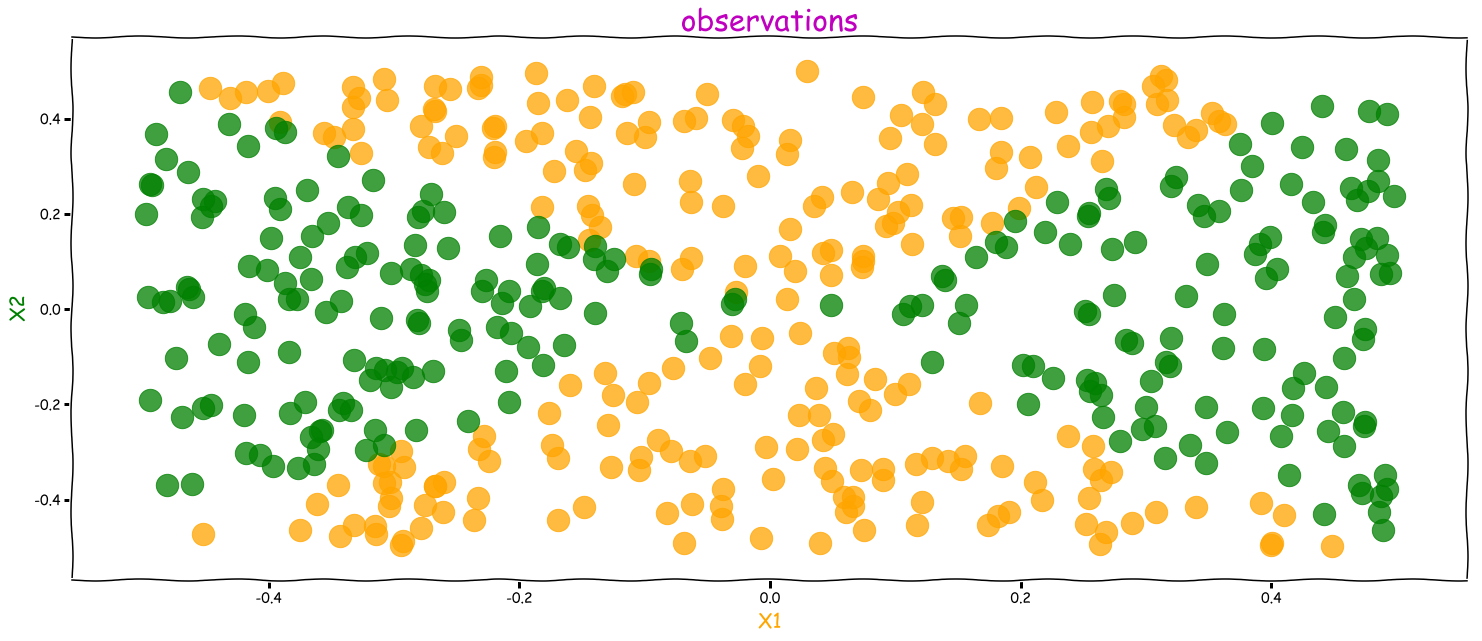

In [39]:
plt.xkcd()
plt.figure(figsize=(25, 10))
plt.scatter(x=x1[y==0], y=x2[y==0], cmap='viridis', c='orange', s=500, marker='o', alpha=0.75)
plt.scatter(x=x1[y==1], y=x2[y==1], cmap='viridis', c='green', s=500, marker='o', alpha=0.75)
plt.title('observations', color='m', fontsize=30)
plt.xlabel('X1', color='orange', fontsize=20)
plt.ylabel('X2', color='green', fontsize=20)

**Clearly, there is a non-linear decision boundary.**

***

## 5.c. Fitting logistic regression model to the data, using $X1$ and $X2$ as predictors

In [231]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [232]:
X = pd.concat([pd.DataFrame([x1]), pd.DataFrame([x2])], axis=0).T
X.columns = ['X1', 'X2']
X.head()

,X1,X2
0,-0.059157,0.401049
1,-0.442600,0.227200
2,0.255213,-0.172164
3,0.424271,0.339486
4,0.465795,0.020465


In [233]:
logfit = LogisticRegression(solver='liblinear').fit(X, y.ravel())

***

## 5.d. Performing logistic regression on training data and plotting predictions

In [235]:
from sklearn.metrics import confusion_matrix, classification_report

In [236]:
Y = pd.DataFrame([y]).T
df = pd.concat([Y, X], axis=1)
df.columns = ['Y', 'X1', 'X2']
df.head()

,Y,X1,X2
0,0,-0.059157,0.401049
1,1,-0.442600,0.227200
2,1,0.255213,-0.172164
3,1,0.424271,0.339486
4,1,0.465795,0.020465


In [237]:
logpred = pd.DataFrame([logfit.predict(X)]).T
logpred.columns = ['Y_PRED']
logpred.head()

,Y_PRED
0,0
1,0
2,1
3,1
4,1


In [238]:
df = pd.concat([logpred, df], axis=1,  sort=False)
df.head()

,Y_PRED,Y,X1,X2
0,0,0,-0.059157,0.401049
1,0,1,-0.442600,0.227200
2,1,1,0.255213,-0.172164
3,1,1,0.424271,0.339486
4,1,1,0.465795,0.020465


Text(0,0.5,'X2')

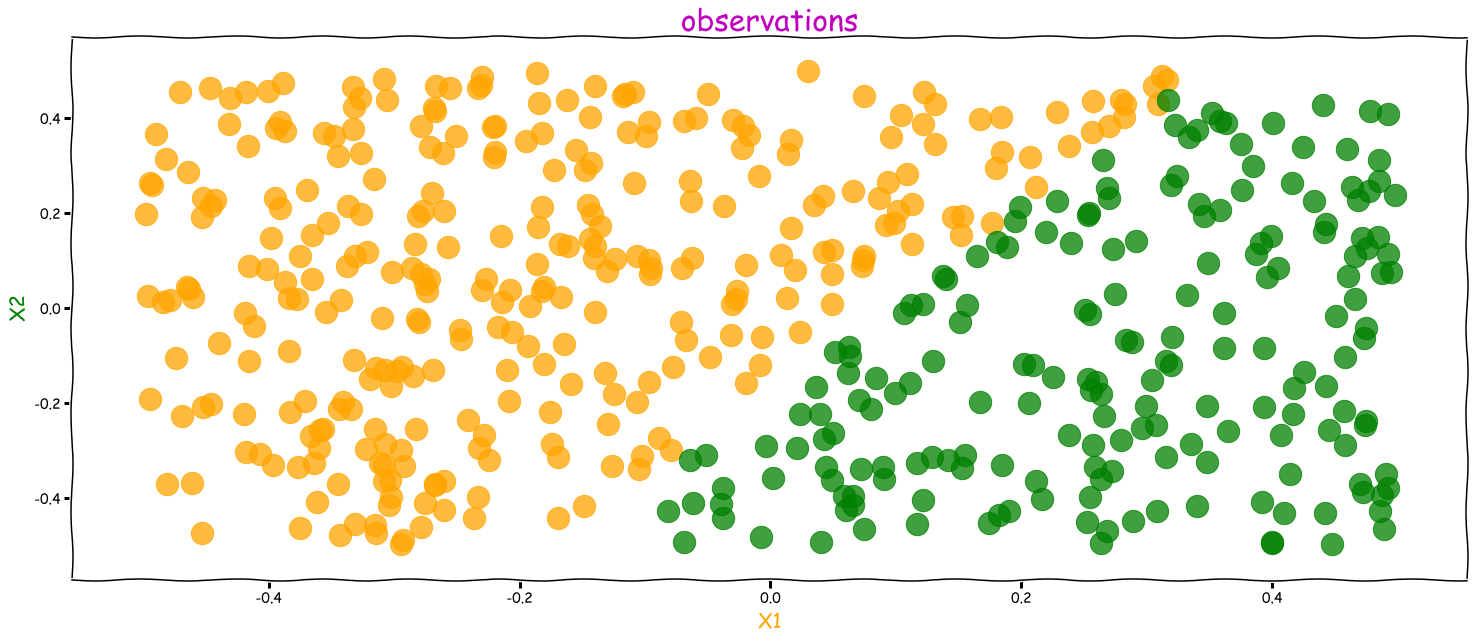

In [239]:
plt.xkcd()
plt.figure(figsize=(25, 10))
plt.scatter(x=df.X1[df.Y_PRED==0], y=df.X2[df.Y_PRED==0], cmap='viridis', c='orange', s=500, marker='o', alpha=0.75)
plt.scatter(x=df.X1[df.Y_PRED==1], y=df.X2[df.Y_PRED==1], cmap='viridis', c='green', s=500, marker='o', alpha=0.75)
plt.title('observations', color='m', fontsize=30)
plt.xlabel('X1', color='orange', fontsize=20)
plt.ylabel('X2', color='green', fontsize=20)

In [241]:
conf_mat = pd.DataFrame(confusion_matrix(df.Y, df.Y_PRED).T, index = [0, 1], columns = [0, 1])
conf_mat

,0,1
0,175,133
1,77,115


In [243]:
class_rep = classification_report(df.Y, df.Y_PRED)
print(class_rep)

              precision    recall  f1-score   support

           0       0.57      0.69      0.62       252
           1       0.60      0.46      0.52       248

   micro avg       0.58      0.58      0.58       500
   macro avg       0.58      0.58      0.57       500
weighted avg       0.58      0.58      0.57       500



**Therefore, there is a linear decision boundary.**

***

## 5.e. Logistic regression with non-linear functions of $X1$ & $X2$

**$X_1$ x $X_2$**

In [244]:
x1x2 = x1*x2

X = pd.concat([pd.DataFrame([x1]), pd.DataFrame([x2]), pd.DataFrame([x1x2])], axis=0).T
X.columns = ['X1', 'X2', 'X1 x X2']
X.head()

,X1,X2,X1 x X2
0,-0.059157,0.401049,-0.023725
1,-0.442600,0.227200,-0.100559
2,0.255213,-0.172164,-0.043939
3,0.424271,0.339486,0.144034
4,0.465795,0.020465,0.009532


In [245]:
logfitX1X2 = LogisticRegression(solver='liblinear').fit(X, y.ravel())

In [246]:
Y = pd.DataFrame([y]).T
df = pd.concat([Y, X], axis=1)
df.columns = ['Y', 'X1', 'X2', 'X1 x X2']
df.head()

,Y,X1,X2,X1 x X2
0,0,-0.059157,0.401049,-0.023725
1,1,-0.442600,0.227200,-0.100559
2,1,0.255213,-0.172164,-0.043939
3,1,0.424271,0.339486,0.144034
4,1,0.465795,0.020465,0.009532


In [247]:
logpred = pd.DataFrame([logfitX1X2.predict(X)]).T
logpred.columns = ['Y_PRED']
logpred.head()

,Y_PRED
0,0
1,0
2,1
3,1
4,1


In [248]:
df = pd.concat([logpred, df], axis=1,  sort=False)
df.head()

,Y_PRED,Y,X1,X2,X1 x X2
0,0,0,-0.059157,0.401049,-0.023725
1,0,1,-0.442600,0.227200,-0.100559
2,1,1,0.255213,-0.172164,-0.043939
3,1,1,0.424271,0.339486,0.144034
4,1,1,0.465795,0.020465,0.009532


Text(0,0.5,'X1 x X2')

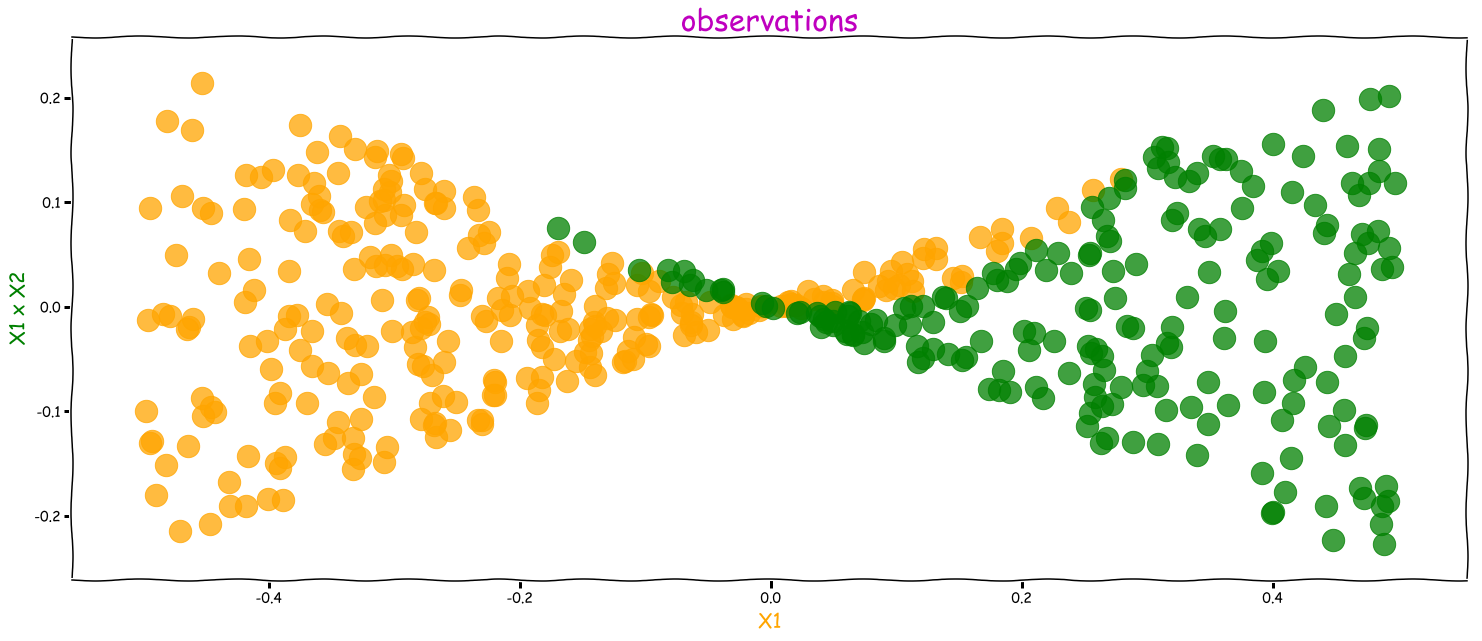

In [249]:
plt.xkcd()
plt.figure(figsize=(25, 10))
plt.scatter(x=df.X1[df.Y_PRED==0], y=df['X1 x X2'][df.Y_PRED==0], cmap='viridis', c='orange', s=500, marker='o', alpha=0.75)
plt.scatter(x=df.X1[df.Y_PRED==1], y=df['X1 x X2'][df.Y_PRED==1], cmap='viridis', c='green', s=500, marker='o', alpha=0.75)
plt.title('observations', color='m', fontsize=30)
plt.xlabel('X1', color='orange', fontsize=20)
plt.ylabel('X1 x X2', color='green', fontsize=20)

Text(0,0.5,'X1 x X2')

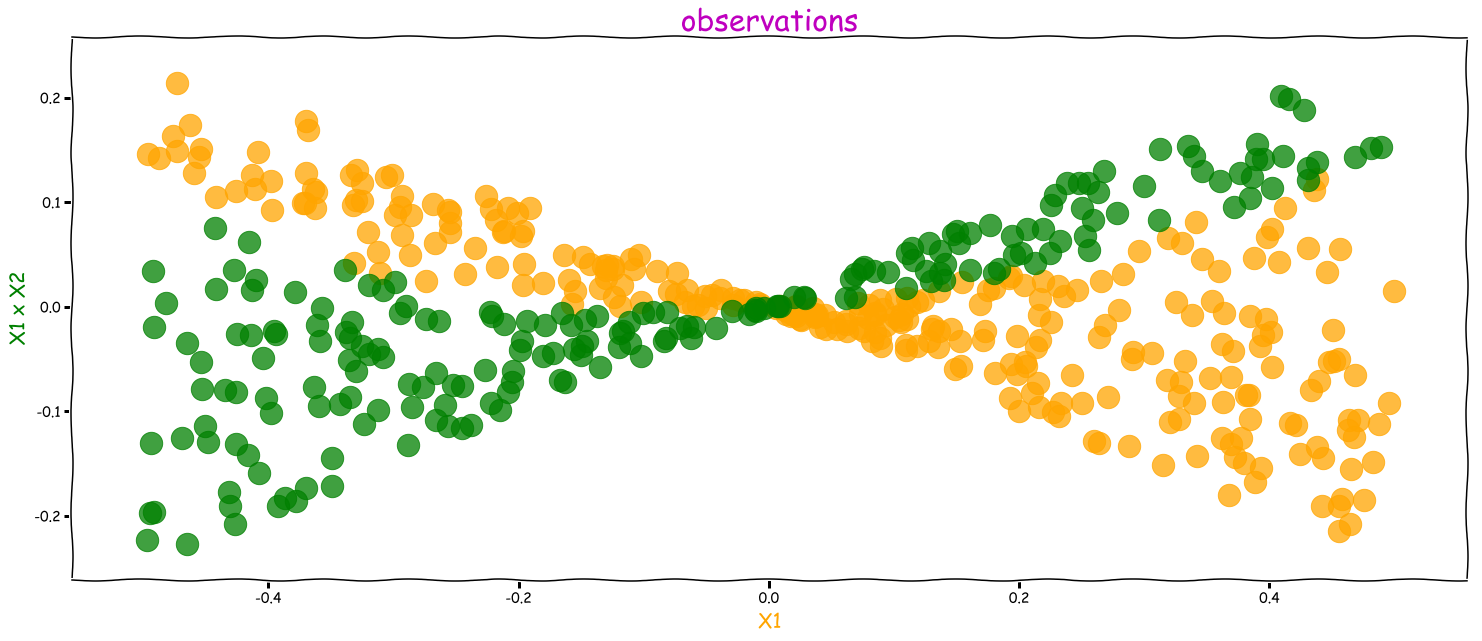

In [250]:
plt.xkcd()
plt.figure(figsize=(25, 10))
plt.scatter(x=df.X2[df.Y_PRED==0], y=df['X1 x X2'][df.Y_PRED==0], cmap='viridis', c='orange', s=500, marker='o', alpha=0.75)
plt.scatter(x=df.X2[df.Y_PRED==1], y=df['X1 x X2'][df.Y_PRED==1], cmap='viridis', c='green', s=500, marker='o', alpha=0.75)
plt.title('observations', color='m', fontsize=30)
plt.xlabel('X1', color='orange', fontsize=20)
plt.ylabel('X1 x X2', color='green', fontsize=20)

In [251]:
conf_mat = pd.DataFrame(confusion_matrix(df.Y, df.Y_PRED).T, index = [0, 1], columns = [0, 1])
conf_mat

,0,1
0,161,133
1,91,115


In [252]:
class_rep = classification_report(df.Y, df.Y_PRED)
print(class_rep)

              precision    recall  f1-score   support

           0       0.55      0.64      0.59       252
           1       0.56      0.46      0.51       248

   micro avg       0.55      0.55      0.55       500
   macro avg       0.55      0.55      0.55       500
weighted avg       0.55      0.55      0.55       500



**$X_1^2$**

In [253]:
x12 = x1**2

X = pd.concat([pd.DataFrame([x1]), pd.DataFrame([x2]), pd.DataFrame([x12])], axis=0).T
X.columns = ['X1', 'X2', 'X1^2']
X.head()

,X1,X2,X1^2
0,-0.059157,0.401049,0.003500
1,-0.442600,0.227200,0.195895
2,0.255213,-0.172164,0.065134
3,0.424271,0.339486,0.180006
4,0.465795,0.020465,0.216965


In [254]:
logfitX12 = LogisticRegression(solver='liblinear').fit(X, y.ravel())

In [255]:
Y = pd.DataFrame([y]).T
df = pd.concat([Y, X], axis=1)
df.columns = ['Y', 'X1', 'X2', 'X1^2']
df.head()

,Y,X1,X2,X1^2
0,0,-0.059157,0.401049,0.003500
1,1,-0.442600,0.227200,0.195895
2,1,0.255213,-0.172164,0.065134
3,1,0.424271,0.339486,0.180006
4,1,0.465795,0.020465,0.216965


In [256]:
logpred = pd.DataFrame([logfitX12.predict(X)]).T
logpred.columns = ['Y_PRED']
logpred.head()

,Y_PRED
0,0
1,1
2,0
3,1
4,1


In [257]:
df = pd.concat([logpred, df], axis=1,  sort=False)
df.head()

,Y_PRED,Y,X1,X2,X1^2
0,0,0,-0.059157,0.401049,0.003500
1,1,1,-0.442600,0.227200,0.195895
2,0,1,0.255213,-0.172164,0.065134
3,1,1,0.424271,0.339486,0.180006
4,1,1,0.465795,0.020465,0.216965


Text(0,0.5,'X1^2')

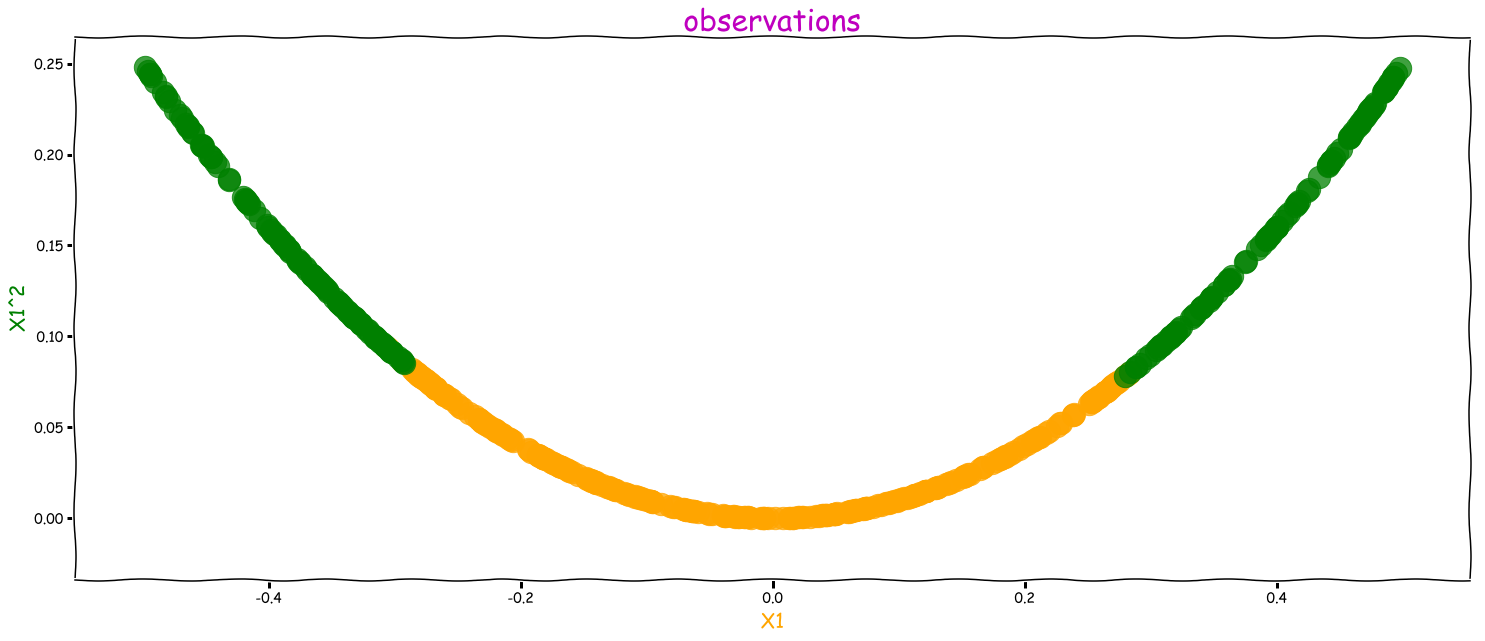

In [258]:
plt.xkcd()
plt.figure(figsize=(25, 10))
plt.scatter(x=df.X1[df.Y_PRED==0], y=df['X1^2'][df.Y_PRED==0], cmap='viridis', c='orange', s=500, marker='o', alpha=0.75)
plt.scatter(x=df.X1[df.Y_PRED==1], y=df['X1^2'][df.Y_PRED==1], cmap='viridis', c='green', s=500, marker='o', alpha=0.75)
plt.title('observations', color='m', fontsize=30)
plt.xlabel('X1', color='orange', fontsize=20)
plt.ylabel('X1^2', color='green', fontsize=20)

Text(0,0.5,'X1^2')

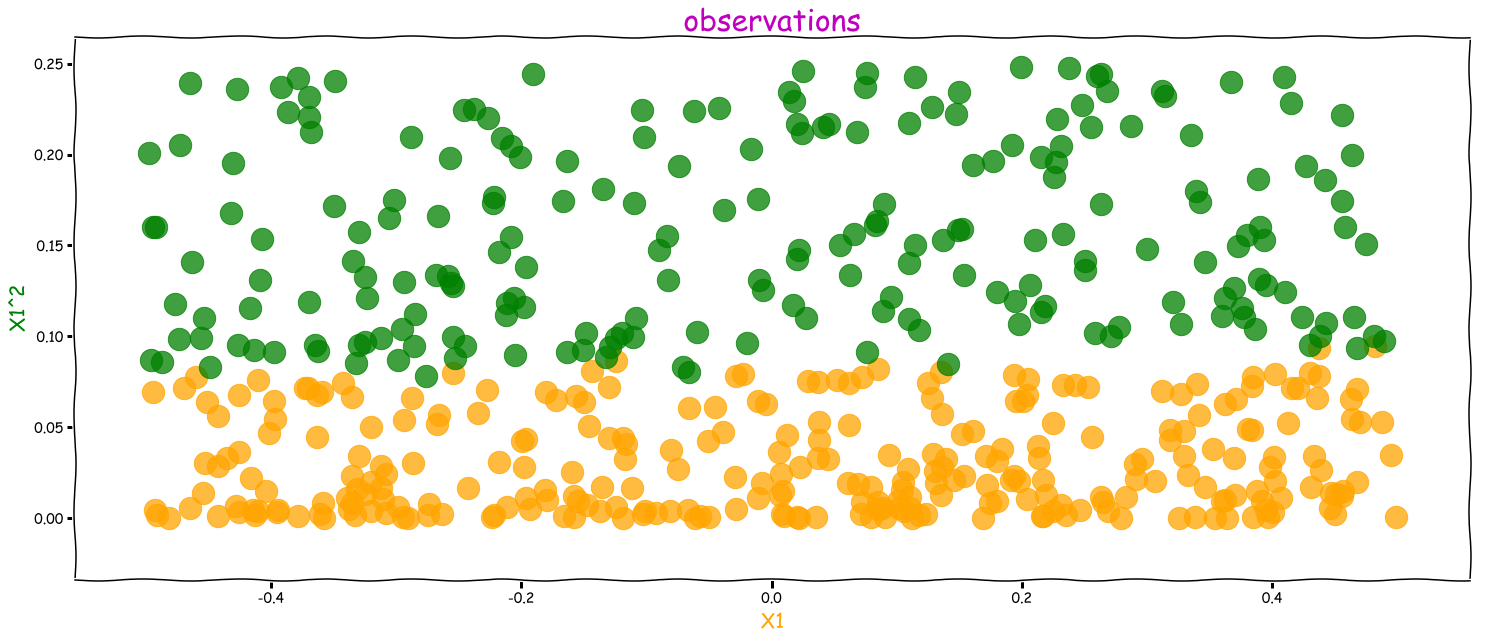

In [259]:
plt.xkcd()
plt.figure(figsize=(25, 10))
plt.scatter(x=df.X2[df.Y_PRED==0], y=df['X1^2'][df.Y_PRED==0], cmap='viridis', c='orange', s=500, marker='o', alpha=0.75)
plt.scatter(x=df.X2[df.Y_PRED==1], y=df['X1^2'][df.Y_PRED==1], cmap='viridis', c='green', s=500, marker='o', alpha=0.75)
plt.title('observations', color='m', fontsize=30)
plt.xlabel('X1', color='orange', fontsize=20)
plt.ylabel('X1^2', color='green', fontsize=20)

In [260]:
conf_mat = pd.DataFrame(confusion_matrix(df.Y, df.Y_PRED).T, index = [0, 1], columns = [0, 1])
conf_mat

,0,1
0,202,84
1,50,164


In [261]:
class_rep = classification_report(df.Y, df.Y_PRED)
print(class_rep)

              precision    recall  f1-score   support

           0       0.71      0.80      0.75       252
           1       0.77      0.66      0.71       248

   micro avg       0.73      0.73      0.73       500
   macro avg       0.74      0.73      0.73       500
weighted avg       0.74      0.73      0.73       500



**$X_2^2$**

In [262]:
x22 = x2**2

X = pd.concat([pd.DataFrame([x1]), pd.DataFrame([x2]), pd.DataFrame([x22])], axis=0).T
X.columns = ['X1', 'X2', 'X2^2']
X.head()

,X1,X2,X2^2
0,-0.059157,0.401049,0.160840
1,-0.442600,0.227200,0.051620
2,0.255213,-0.172164,0.029641
3,0.424271,0.339486,0.115251
4,0.465795,0.020465,0.000419


In [263]:
logfitX22 = LogisticRegression(solver='liblinear').fit(X, y.ravel())

In [264]:
Y = pd.DataFrame([y]).T
df = pd.concat([Y, X], axis=1)
df.columns = ['Y', 'X1', 'X2', 'X2^2']
df.head()

,Y,X1,X2,X2^2
0,0,-0.059157,0.401049,0.160840
1,1,-0.442600,0.227200,0.051620
2,1,0.255213,-0.172164,0.029641
3,1,0.424271,0.339486,0.115251
4,1,0.465795,0.020465,0.000419


In [265]:
logpred = pd.DataFrame([logfitX12.predict(X)]).T
logpred.columns = ['Y_PRED']
logpred.head()

,Y_PRED
0,1
1,0
2,0
3,1
4,0


In [266]:
df = pd.concat([logpred, df], axis=1,  sort=False)
df.head()

,Y_PRED,Y,X1,X2,X2^2
0,1,0,-0.059157,0.401049,0.160840
1,0,1,-0.442600,0.227200,0.051620
2,0,1,0.255213,-0.172164,0.029641
3,1,1,0.424271,0.339486,0.115251
4,0,1,0.465795,0.020465,0.000419


Text(0,0.5,'X2^2')

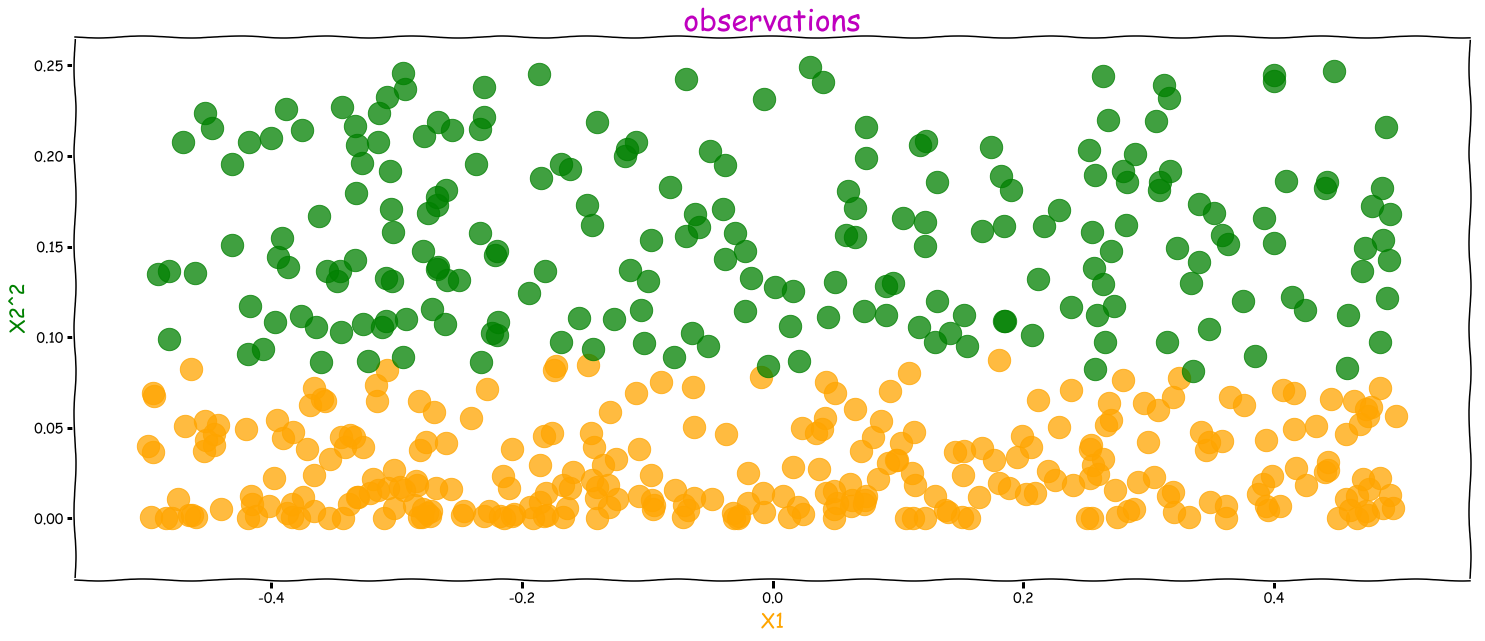

In [267]:
plt.xkcd()
plt.figure(figsize=(25, 10))
plt.scatter(x=df.X1[df.Y_PRED==0], y=df['X2^2'][df.Y_PRED==0], cmap='viridis', c='orange', s=500, marker='o', alpha=0.75)
plt.scatter(x=df.X1[df.Y_PRED==1], y=df['X2^2'][df.Y_PRED==1], cmap='viridis', c='green', s=500, marker='o', alpha=0.75)
plt.title('observations', color='m', fontsize=30)
plt.xlabel('X1', color='orange', fontsize=20)
plt.ylabel('X2^2', color='green', fontsize=20)

Text(0,0.5,'X2^2')

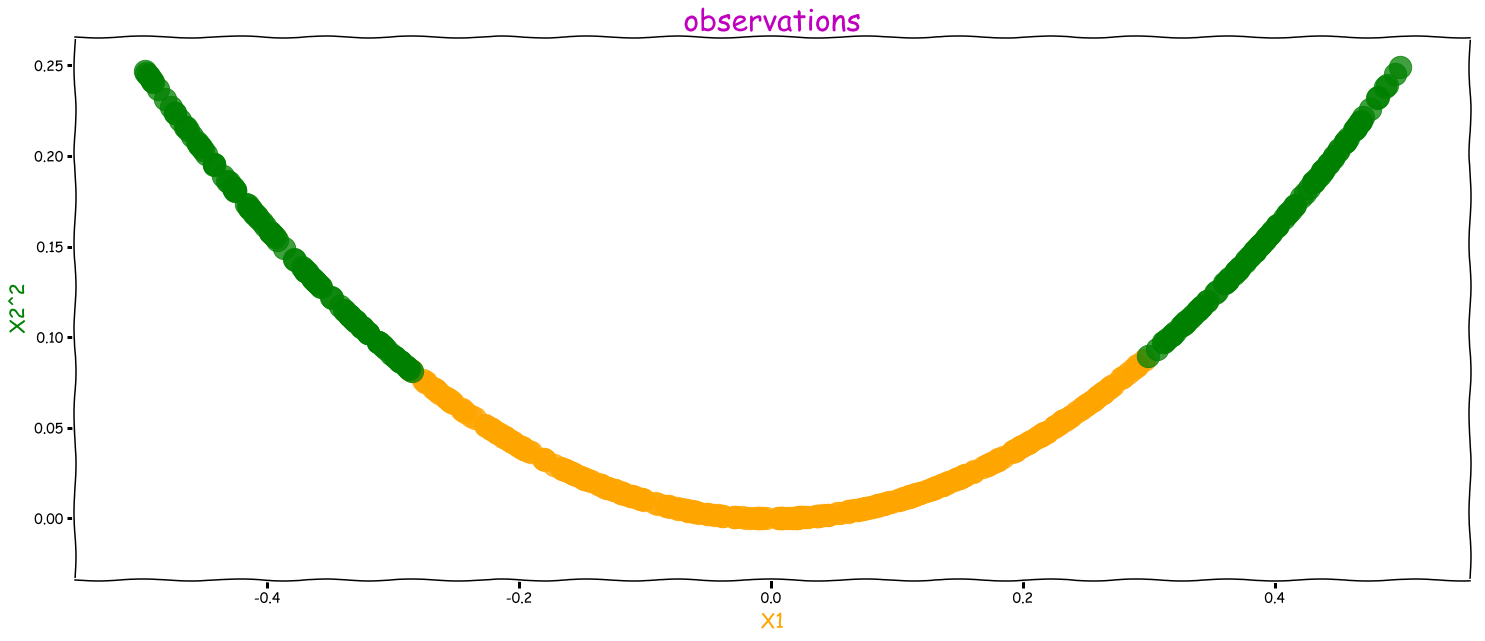

In [268]:
plt.xkcd()
plt.figure(figsize=(25, 10))
plt.scatter(x=df.X2[df.Y_PRED==0], y=df['X2^2'][df.Y_PRED==0], cmap='viridis', c='orange', s=500, marker='o', alpha=0.75)
plt.scatter(x=df.X2[df.Y_PRED==1], y=df['X2^2'][df.Y_PRED==1], cmap='viridis', c='green', s=500, marker='o', alpha=0.75)
plt.title('observations', color='m', fontsize=30)
plt.xlabel('X1', color='orange', fontsize=20)
plt.ylabel('X2^2', color='green', fontsize=20)

In [269]:
conf_mat = pd.DataFrame(confusion_matrix(df.Y, df.Y_PRED).T, index = [0, 1], columns = [0, 1])
conf_mat

,0,1
0,79,209
1,173,39


In [270]:
class_rep = classification_report(df.Y, df.Y_PRED)
print(class_rep)

              precision    recall  f1-score   support

           0       0.27      0.31      0.29       252
           1       0.18      0.16      0.17       248

   micro avg       0.24      0.24      0.24       500
   macro avg       0.23      0.24      0.23       500
weighted avg       0.23      0.24      0.23       500



**Therefore, the non-linear boundaries don't really explain the true decision boundary well ($X1^2$ is still able to approximate the true decision boundary somewhat).**

***

## 5.g. Support vector classifier to the data with $X1$ and $X2$ as predictors along with plot

In [298]:
from sklearn.svm import SVC

In [299]:
X = pd.concat([pd.DataFrame([x1]), pd.DataFrame([x2])], axis=0).T
X.columns = ['X1', 'X2']
X.head()

,X1,X2
0,-0.059157,0.401049
1,-0.442600,0.227200
2,0.255213,-0.172164
3,0.424271,0.339486
4,0.465795,0.020465


In [300]:
Y = pd.DataFrame([y]).T
df = pd.concat([Y, X], axis=1)
df.columns = ['Y', 'X1', 'X2']
df.head()

,Y,X1,X2
0,0,-0.059157,0.401049
1,1,-0.442600,0.227200
2,1,0.255213,-0.172164
3,1,0.424271,0.339486
4,1,0.465795,0.020465


In [301]:
svmfit = SVC(kernel='linear', C=10).fit(X, y)

Text(0,0.5,'X[:, 1]')

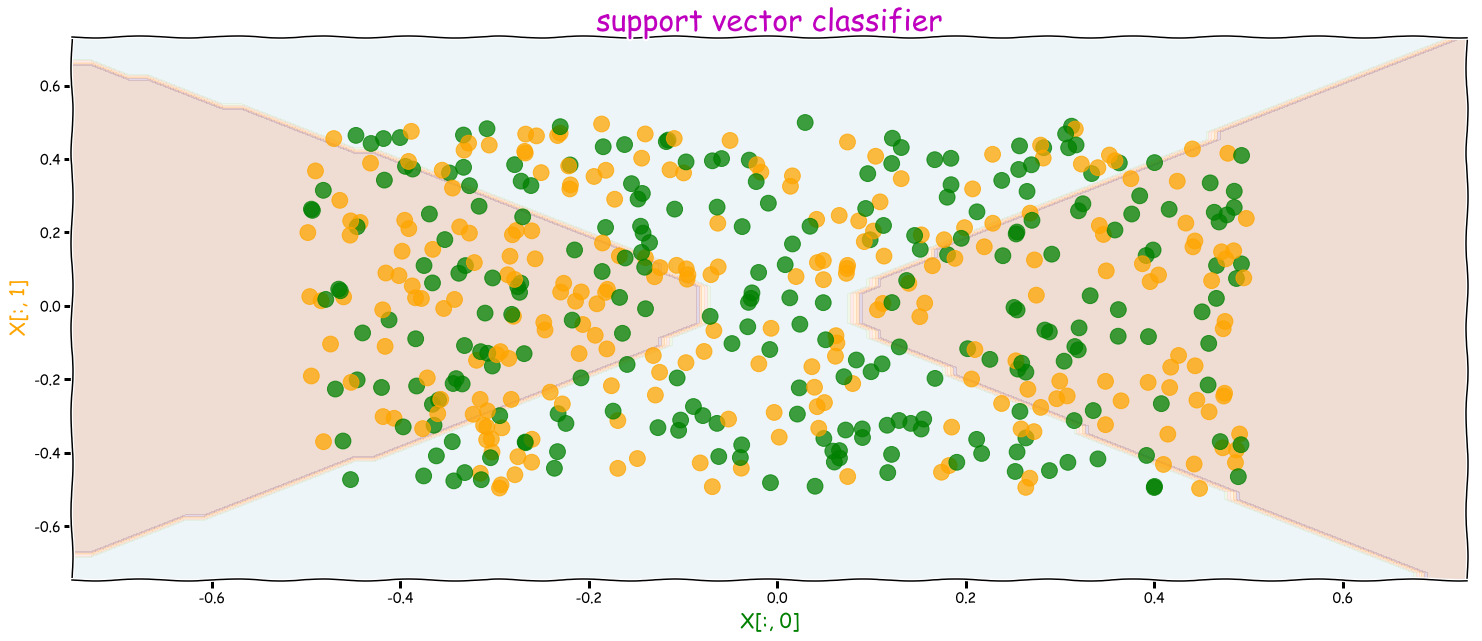

In [325]:
def svmplot(svc, X, y, height=0.02, buffer=0.25):
    x_min, x_max = X.X1.min()-buffer, X.X1.max()+buffer
    y_min, y_max = X.X2.min()-buffer, X.X2.max()+buffer
    xx, yy = np.meshgrid(np.arange(x_min, x_max, height), np.arange(y_min, y_max, height))
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.2)
    
plt.xkcd()
plt.figure(figsize=(25, 10))
svmplot(svmfit, X, y)
plt.scatter(X.X1[:],X.X2[:], marker='o', s=250, c=['green', 'orange'], alpha=0.75)
plt.title('support vector classifier', color='m', fontsize=30)
plt.xlabel('X[:, 0]', color='green', fontsize=20)
plt.ylabel('X[:, 1]', color='orange', fontsize=20)

In [303]:
svmpred = pd.DataFrame([svmfit.predict(X)]).T
svmpred.columns = ['Y_PRED']
svmpred.head()

,Y_PRED
0,0
1,0
2,1
3,1
4,1


In [304]:
df = pd.concat([svmpred, df], axis=1,)
df.head()

,Y_PRED,Y,X1,X2
0,0,0,-0.059157,0.401049
1,0,1,-0.442600,0.227200
2,1,1,0.255213,-0.172164
3,1,1,0.424271,0.339486
4,1,1,0.465795,0.020465


In [306]:
conf_mat = pd.DataFrame(confusion_matrix(df.Y, df.Y_PRED).T, index = [0, 1], columns = [0, 1])
conf_mat

,0,1
0,152,133
1,100,115


In [307]:
class_rep = classification_report(df.Y, df.Y_PRED)
print(class_rep)

              precision    recall  f1-score   support

           0       0.53      0.60      0.57       252
           1       0.53      0.46      0.50       248

   micro avg       0.53      0.53      0.53       500
   macro avg       0.53      0.53      0.53       500
weighted avg       0.53      0.53      0.53       500



**Support vector classifier with linear decision boundary doesn't provide significant improvements over logistic regression.**

## 5.h. Support vector machine to the data with $X1$ and $X2$ as predictors along with plot

In [314]:
svmfit = SVC(C=10, kernel='rbf', gamma=1).fit(X, y)

In [317]:
X = pd.concat([pd.DataFrame([x1]), pd.DataFrame([x2])], axis=0).T
X.columns = ['X1', 'X2']
X.head()

,X1,X2
0,-0.059157,0.401049
1,-0.442600,0.227200
2,0.255213,-0.172164
3,0.424271,0.339486
4,0.465795,0.020465


In [318]:
Y = pd.DataFrame([y]).T
df = pd.concat([Y, X], axis=1)
df.columns = ['Y', 'X1', 'X2']
df.head()

,Y,X1,X2
0,0,-0.059157,0.401049
1,1,-0.442600,0.227200
2,1,0.255213,-0.172164
3,1,0.424271,0.339486
4,1,0.465795,0.020465


Text(0,0.5,'X[:, 1]')

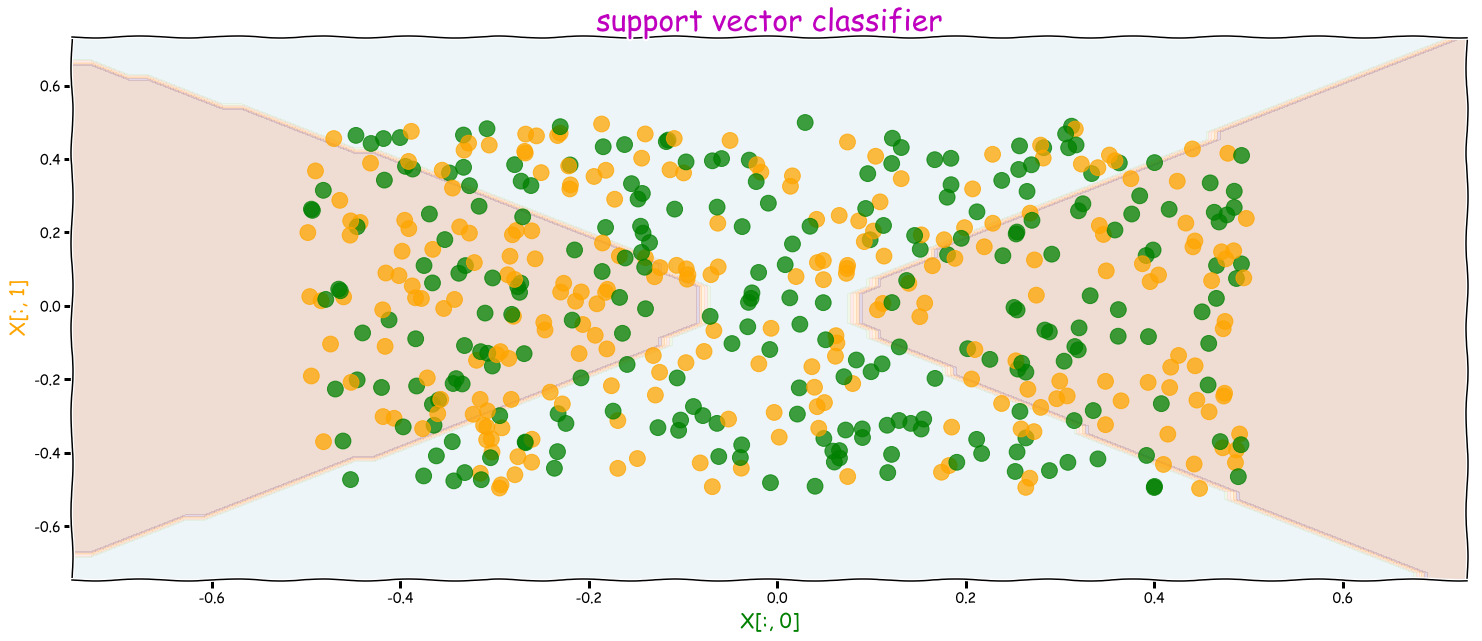

In [326]:
plt.xkcd()
plt.figure(figsize=(25, 10))
svmplot(svmfit, X, y)
plt.scatter(X.X1[:],X.X2[:], marker='o', s=250, c=['green', 'orange'], alpha=0.75)
plt.title('support vector classifier', color='m', fontsize=30)
plt.xlabel('X[:, 0]', color='green', fontsize=20)
plt.ylabel('X[:, 1]', color='orange', fontsize=20)

In [320]:
svmpred = pd.DataFrame([svmfit.predict(X)]).T
svmpred.columns = ['Y_PRED']
svmpred.head()

,Y_PRED
0,0
1,1
2,1
3,1
4,1


In [321]:
df = pd.concat([svmpred, df], axis=1,)
df.head()

,Y_PRED,Y,X1,X2
0,0,0,-0.059157,0.401049
1,1,1,-0.442600,0.227200
2,1,1,0.255213,-0.172164
3,1,1,0.424271,0.339486
4,1,1,0.465795,0.020465


In [322]:
conf_mat = pd.DataFrame(confusion_matrix(df.Y, df.Y_PRED).T, index = [0, 1], columns = [0, 1])
conf_mat

,0,1
0,250,14
1,2,234


In [323]:
class_rep = classification_report(df.Y, df.Y_PRED)
print(class_rep)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       252
           1       0.99      0.94      0.97       248

   micro avg       0.97      0.97      0.97       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.97      0.97      0.97       500



**SVM provides an extremely significant improvement in prediction over logistic regression as well as support vector classifier.**

## 5.i. Comment on results

**This question shows the power of support vector machines over other linear measures like logistic regression and support vector classifiers. This can be seen through predictive precision of different models above.**